<a href="https://colab.research.google.com/github/YenLinWu/Python_for_NCCU_Accounting/blob/main/Drawing_with_Circles_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drawing with Circles in Python**

Reference : [Drawing Mona Lisa with 256 Circles in Python](https://fb.watch/5m87uMwF5T/)
* GitHub Link : [https://github.com/ahmedkhalf/Circle-Evolution](https://github.com/ahmedkhalf/Circle-Evolution)
* Contributor : Ahmed Khalf、Guilherme de Amorim  

In [ ]:
#@title Install Install circle-evolution library
!pip install circle-evolution  

# Restart the runtime
import os
def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

     |████████████████████████████████| 28.2MB 110kB/s 
     |████████████████████████████████| 20.2MB 1.4MB/s 
     |████████████████████████████████| 12.4MB 253kB/s 
     |████████████████████████████████| 12.5MB 196kB/s 
  Created wheel for circle-evolution: filename=circle_evolution-0.1-cp37-none-any.whl size=7979 sha256=789d7837d6bfa222b452c71ebfb5ec7051124e475a69a4ebfc1300c010bbaf5c
  Stored in directory: /root/.cache/pip/wheels/df/25/3e/e7058a094be97b00569ccb59b81f042016dc8d6bd1fa83cf0d
Successfully built circle-evolution
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.18.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found exi

In [ ]:
#@title Import library 

from circle_evolution import evolution
from circle_evolution import helpers
import circle_evolution.fitness as fitness
from circle_evolution.species import Specie
import numpy as np
import cv2
import tensorflow as tf 
from google.colab import files

print( 'NumPy version:', np.__version__ )
print( 'TensorFlow version:', tf.__version__ )

NumPy version: 1.18.4
TensorFlow version: 2.4.1


In [ ]:
#@title Upload image
uploaded = files.upload()

Saving 101.jpeg to 101.jpeg


Original Size: ( Height, Weight )= (2006, 1200)
New Size: ( Height, Weight )= (256, 153)


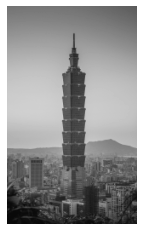

In [ ]:
#@title Read image
#@markdown - max_dim (int) : Output image size ( Multiple of 64 )
max_dim =  256#@param {type:"integer"} 


# Get the uploaded file name 
filename = next(iter(uploaded))

# New size for training 
original_img = cv2.imread( filename )
long_dim = max( original_img.shape[:2] )
scale = max_dim/long_dim
new_size = tf.cast( tf.cast(original_img.shape[:2],tf.float32)*scale, tf.int32 ).numpy()

# Load image
target = helpers.load_target_image( filename, size=(new_size[1],new_size[0]) )

# Show image
print( 'Original Size: ( Height, Weight )=', original_img.shape[:2] )
print( 'New Size: ( Height, Weight )=', tuple(new_size) )
helpers.show_image( target )

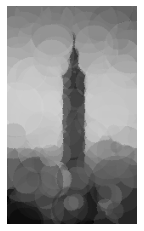

Total time: 0:25:37.166946


In [ ]:
#@title Drawing image
#@markdown - genes (int) : the amount of circle to train the target image on. ( default : 100 ) 
genes =  150#@param {type:"integer"}
#@markdown - generation (int) : amount of generations Evolution class has trained. ( default : 100000 )
generation = 100000#@param {type:"integer"}

import time
import datetime
import IPython.display as display
from IPython.display import clear_output

start = time.time()

e = evolution.Evolution( size=target.shape, target=target, genes=genes )
e.evolve( max_generation=generation )
display.clear_output( wait=True )
helpers.show_image( e.specie.phenotype )
                             
end = time.time()
print( 'Total time:', str( datetime.timedelta(seconds=end-start) ) )

In [ ]:
#@title Save output image 
output_file_name = '101' #@param {type:"string"}
cv2.imwrite( output_file_name+'.jpg', e.specie.phenotype )
files.download( output_file_name+'.jpg' ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>